In [1]:
# Importing the required libraries or libraries that may be of use
import pandas as pd
import numpy as np
import re
from datetime import datetime
import plotly.express as px
from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import chi2_contingency

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, roc_auc_score, f1_score, silhouette_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from scipy.stats import f_oneway
import math

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
# path = '~/work/Users/mitul/project/crsl/'
path = '~/work/User/mitul_DA/project/crsl/'

import warnings
warnings.filterwarnings('ignore')

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# Reading the input data that has market-related features, text-transcripts and the ratings of the debt instruments
df = pd.read_excel(path+'Artificial_Data.xlsx')
print (df.shape)

(100, 154)


### Descriptive Statistics

In [4]:
# Getting a glimpse of the data 
df.head(2)

RATING_TYPE Rating  FundaIndxint  FundaIndxsga  monthvwretd  monthvwretx  \
0       Fitch     A+      0.150659     -0.420047    -0.846934     0.560226   
1     Moody's     BB     -0.015715      0.139204    -0.045250    -0.912128   

   monthewretd  monthewretx  monthsprtrn  monthspindx  monthCAP1RET  \
0     0.579303    -0.578314    -0.225006    -0.415867     -1.215753   
1     0.497292    -0.910558     1.207592    -0.104050      0.154247   

   monthCAP2RET  monthCAP3RET  monthCAP4RET  monthCAP5RET  monthCAP6RET  \
0     -0.476301      0.874834     -1.022435     -0.592828     -1.241319   
1      1.388313     -2.156981      2.079946     -0.507333      0.605540   

   monthCAP7RET  monthCAP8RET  monthCAP9RET  monthCAP10RET  monthtotval  \
0      0.693856      2.543668     -0.063223      -0.078271     1.425937   
1     -0.102836      0.182807     -1.521528      -0.345610     1.308224   

   monthtotcnt  monthusdval  monthusdcnt  monthprtcnt  monthtotret  \
0    -0.286392     0.107695     0.368484     0.473373     0.396630   
1     0.327420     0.411786    -0.179510     1.335656    -1.313861   

   monthtotind  monthcapret  monthcapind  monthincret  monthincind  \
0     1.044191    -0.669476    -0.111602     1.130983     1.152031   
1     3.121897     0.275221    -0.771017     0.750278     1.822169   

   SPIndvwretd  SPIndvwretx  SPIndewretd  SPIndewretx  SPIndtotval  \
0     0.302311    -0.736802    -0.443736     0.272516     0.404059   
1     0.752827    -0.366732     1.194922    -1.859780    -1.346370   

   SPIndtotcnt  SPIndusdval  SPIndusdcnt  SPIndspindx  SPIndsprtrn  \
0     0.915985     1.851882      0.90896     0.000710    -0.694966   
1     0.749366    -0.281068      0.45939    -0.175449    -0.027828   

   SPporvwretd  SPporvwretx  SPporewretd  SPporewretx  SPportotval  \
0    -0.975380     1.141629     1.958655     2.063247     -2.14404   
1     0.936036    -0.442155     0.143769     0.299055      0.17562   

   SPportotcnt  SPporusdval  SPporusdcnt  SPporspindx  SPporsprtrn  \
0     0.160316     0.397852     2.138209     0.053541    -1.229052   
1     1.728682     1.016630     1.318105     0.971610     1.123097   

   usind2CRSPMEV1  usind2CRSPMEG1  usind2CRSPLCV1  usind2CRSPLCG1  \
0       -1.113458       -1.009830       -1.038158        0.039339   
1        1.522147        0.574736        0.645630        1.393169   

   usind2CRSPMIV1  usind2CRSPMIG1  usind2CRSPSCV1  usind2CRSPSCG1  \
0       -1.235293       -0.782989        0.149919        1.493474   
1        0.041978        2.097410        0.120120        2.118975   

   usind2CRSPMEVT  usind2CRSPMEGT  usind2CRSPLCVT  usind2CRSPLCGT  \
0        0.120604       -0.762732       -0.353671       -0.984878   
1       -0.093658        1.386308       -0.014961       -0.249286   

   usind2CRSPMIVT  usind2CRSPMIGT  usind2CRSPSCVT  usind2CRSPSCGT  \
0        0.230495       -0.126560       -0.498726        1.457921   
1       -0.502040        0.955377       -0.669921        0.902108   

   stockvwretd  stockvwretx  stockvwTotVal  stockvwUsdVal  stockvwTotCnt  \
0    -0.809059    -0.462191      -0.536018       0.402635       2.038329   
1    -1.838453    -1.598496       1.559406      -0.474998      -0.533301   

   stockvwUsdCnt  stockewretd  stockewretx  stockewTotVal  stockewUsdVal  \
0      -0.121149    -0.706920    -0.504695       0.706406        1.09369   
1       1.438526     1.271909     0.127735      -1.275876        3.09343   

   stockewTotCnt  stockewUsdCnt  stocksprtrn  ustreb30ret  ustreb30ind  \
0      -0.820577      -0.542499    -1.055582    -1.057493    -0.586529   
1       1.318330       1.536686     0.966820    -0.188672    -0.004129   

   ustreb20ret  ustreb20ind  ustreb10ret  ustreb10ind  ustreb7ret  ustreb7ind  \
0     0.186066     0.099920    -1.616170     1.050058   -0.052598   -0.762544   
1     1.079702     0.498467    -1.262321     0.575617   -1.927755    0.052918   

   ustreb5ret  ustreb5ind  ustreb2ret  ustreb2ind  ustreb1ret  ustreb1ind  \
0

In [5]:
# Checking out the columns and their data types
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 154 columns):
 #    Column          Dtype  
---   ------          -----  
 0    RATING_TYPE     object 
 1    Rating          object 
 2    FundaIndxint    float64
 3    FundaIndxsga    float64
 4    monthvwretd     float64
 5    monthvwretx     float64
 6    monthewretd     float64
 7    monthewretx     float64
 8    monthsprtrn     float64
 9    monthspindx     float64
 10   monthCAP1RET    float64
 11   monthCAP2RET    float64
 12   monthCAP3RET    float64
 13   monthCAP4RET    float64
 14   monthCAP5RET    float64
 15   monthCAP6RET    float64
 16   monthCAP7RET    float64
 17   monthCAP8RET    float64
 18   monthCAP9RET    float64
 19   monthCAP10RET   float64
 20   monthtotval     float64
 21   monthtotcnt     float64
 22   monthusdval     float64
 23   monthusdcnt     float64
 24   monthprtcnt     float64
 25   monthtotret     float64
 26   monthtotind     float64
 27   monthcapret     flo

In [3]:
# Calculating summary statistiics like mean, std deviation, etc.
num_cols = list(df.select_dtypes(include=float).columns)
desc_df = df[num_cols].describe().T
desc_df['skew'] = df[num_cols].skew()
desc_df['range'] = desc_df['max'] - desc_df['min']
desc_df.sort_values('range',ascending=False,inplace=True)
desc_df[['mean', 'std', '25%', '50%', '75%', 'min', 'max', 'range']].head(10)

mean       std       25%       50%       75%       min  \
stocksprtrn   -0.117400  1.136082 -0.921842 -0.162915  0.453500 -3.408967   
monthewretx    0.032180  1.088224 -0.624850  0.037285  0.824912 -3.568205   
pe_op_basic    0.004278  1.029572 -0.674192  0.010589  0.780400 -3.174749   
ustreb2ret     0.021685  1.062210 -0.690240  0.057190  0.814692 -3.759779   
stockvwUsdCnt -0.020200  1.079103 -0.698121 -0.068054  0.627986 -2.688525   
pe_op_dil      0.143934  1.089341 -0.471235  0.158076  0.869378 -3.046425   
monthprtcnt    0.222348  1.107631 -0.395472  0.273289  0.863187 -2.819931   
monthtotind    0.140732  1.134113 -0.704278  0.252593  0.918735 -2.913672   
evm           -0.096243  1.202225 -0.927628 -0.069719  0.728652 -2.887634   
monthCAP4RET  -0.171137  1.093204 -0.764858 -0.125775  0.635945 -3.388428   

                    max     range  
stocksprtrn    3.075586  6.484552  
monthewretx    2.760762  6.328967  
pe_op_basic    3.145762  6.320511  
ustreb2ret     2.531247  6.291026  
stockvwUsdCnt  3.555617  6.244142  
pe_op_dil      3.155538  6.201962  
monthprtcnt    3.260491  6.080422  
monthtotind    3.121897  6.035569  
evm            3.133537  6.021171  
monthCAP4RET   2.629213  6.017641

In [4]:
# Getting an idea of the min-max ranges on average
desc_df['min'].mean(), desc_df['max'].mean(), desc_df['range'].mean()

(-2.487377276778692, 2.4808891067324446, 4.968266383511137)

In [5]:
# Viewing the categorical columns
cat_cols = list(df.select_dtypes(include=object).columns)
df[cat_cols].head()

RATING_TYPE Rating  \
0       Fitch     A+   
1     Moody's     BB   
2       Fitch     BB   
3       Fitch    BBB   
4     Moody's     AA   

                                                                                               string_values  
0  Challenges remain in the supply chain, but strategic investments in logistics are improving efficiencies.  
1                        The company reported a steady increase in revenue, reflecting strong market demand.  
2                        The company reported a steady increase in revenue, reflecting strong market demand.  
3                        The company reported a steady increase in revenue, reflecting strong market demand.  
4                        The company reported a steady increase in revenue, reflecting strong market demand.

In [6]:
# Viewing the breakdown of the various credit ratings agencies that have rated here
df['RATING_TYPE'].value_counts(dropna=False)

RATING_TYPE
S&P        36
Moody's    33
Fitch      31
Name: count, dtype: int64

In [7]:
# Viewing the breakdown of varoius ratings
df['Rating'].value_counts(dropna=False)

Rating
BBB     18
AA      16
A+      14
A       12
BB      11
AAA     10
BBB+    10
AA+      9
Name: count, dtype: int64

In [6]:
# Defing the target column as Rating and encoding it for future use
target = 'Rating'
le = LabelEncoder()
df[target+'_encoded'] = le.fit_transform(df[target])
df[target+'_encoded'].value_counts(dropna=False)

Rating_encoded
6    18
2    16
1    14
0    12
5    11
4    10
7    10
3     9
Name: count, dtype: int64

### Pre-processing numerical features

In [7]:
# Calculating the proportion of nulls in the features
na_df = (df.isna().sum()/df.shape[0]).reset_index()
na_df[na_df[0]>0]

Empty DataFrame
Columns: [index, 0]
Index: []

In [8]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)  # 25th percentile
    Q3 = df.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return sum((df < lower_bound) | (df > upper_bound))

# Printing out the no of outliers in each feature
for col in num_cols:
    out_count = detect_outliers_iqr(df[col])
    if out_count>0:
        print ('no of outliers for '+col+' :', out_count)

no of outliers for FundaIndxint : 2
no of outliers for FundaIndxsga : 1
no of outliers for monthvwretd : 1
no of outliers for monthvwretx : 2
no of outliers for monthewretd : 1
no of outliers for monthewretx : 1
no of outliers for monthsprtrn : 3
no of outliers for monthspindx : 2
no of outliers for monthCAP1RET : 1
no of outliers for monthCAP3RET : 1
no of outliers for monthCAP4RET : 1
no of outliers for monthCAP5RET : 1
no of outliers for monthCAP10RET : 2
no of outliers for monthtotval : 1
no of outliers for monthusdval : 1
no of outliers for monthusdcnt : 1
no of outliers for monthprtcnt : 3
no of outliers for monthcapret : 1
no of outliers for SPIndvwretd : 1
no of outliers for SPIndvwretx : 3
no of outliers for SPIndtotcnt : 1
no of outliers for SPIndusdval : 1
no of outliers for SPIndspindx : 1
no of outliers for SPIndsprtrn : 1
no of outliers for SPporvwretx : 2
no of outliers for SPporewretd : 1
no of outliers for SPportotval : 3
no of outliers for SPportotcnt : 4
no of outlie

In [9]:
# Fixing for these outliers by capping them
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[(df[col] < lower_bound), col] = Q1
    df.loc[(df[col] > upper_bound), col] = Q3

### Exploratory Data Analysis

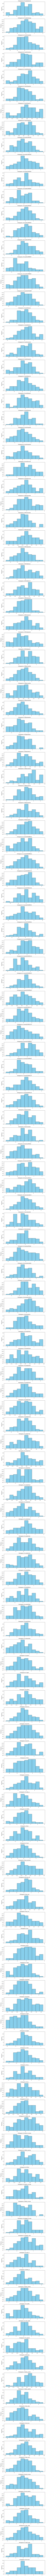

In [11]:
# Plotting histograms for all the numerical features to get an idea of the scale and spread
columns_to_plot = df[num_cols]

n = len(num_cols)
fig, axes = plt.subplots(n, 1, figsize=(8, 3 * n))

if n == 1:
    axes = [axes]

for i, col in enumerate(num_cols):
    axes[i].hist(df[col], color='skyblue', edgecolor='black') #bins=10
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Insights
* Most of the distributions seem to be close to a normal distribution with a very few moderately skewed.
* Most of these features have low to no skew with ranges from -2 to 2.
* SPIndspindx which is a market index is moderately left skewed.
* monthCAP8RET, a return is also moderately positively skewed.
* The total debt to invested capital ratio is also a little positively skewed.
* Thus, these indexes, returns and ratios seem to be on the lower end.

In [12]:
# Calcualting the correlation matrix to analyze any correlation amongst the independent features
corr = df[num_cols+[target+'_encoded']].corr()
corr = corr[target+'_encoded'].reset_index()
corr = corr[corr['index']!=target+'_encoded']
corr.sort_values(target+'_encoded',ascending=False,inplace=True)

In [13]:
# Finding out the best positively correlated features with the encoded target 
pos_corr = corr[corr[target+'_encoded']>0.2]
pos_corr

index  Rating_encoded
95      ustret30ind        0.351786
141        de_ratio        0.270509
53   usind2CRSPMIV1        0.237503
38      SPIndsprtrn        0.219352
49   usind2CRSPMEV1        0.211415

In [14]:
# Finding out the best negatively correlated features with the encoded target
neg_corr = corr[corr[target+'_encoded']<-0.2].sort_values(target+'_encoded')
neg_corr

index  Rating_encoded
21   monthusdcnt       -0.236687
91    ustreb1ind       -0.212804
111       pe_exi       -0.211383
133      debt_at       -0.202410
2    monthvwretd       -0.200325

In [15]:
final_num_cols = pos_corr['index'].tolist() + neg_corr['index'].tolist()
print (final_num_cols)

['ustret30ind', 'de_ratio', 'usind2CRSPMIV1', 'SPIndsprtrn', 'usind2CRSPMEV1', 'monthusdcnt', 'ustreb1ind', 'pe_exi', 'debt_at', 'monthvwretd']


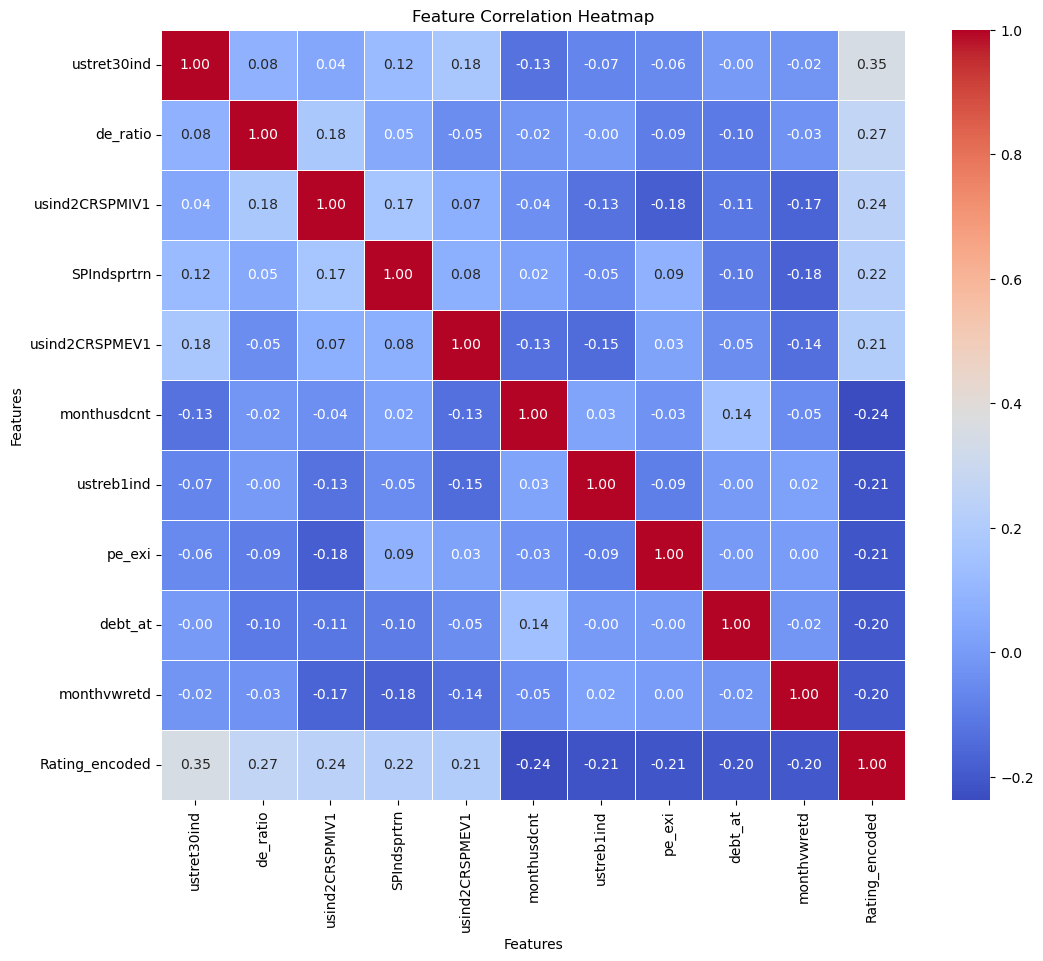

In [16]:
# Creating correlation matrix heatmap
corr_matrix = df[final_num_cols+[target+'_encoded']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.ylabel("Features")
plt.xlabel("Features")
plt.show()

#### Insights
* No significant inter-correlations between the independent features.
* In terms of the encoded target, we can see that ustret30ind, de_ratio, usind2CRSPMIV1, SPIndsprtrn and usind2CRSPMEV1 are positively correlated.
* This aligns with business logic, as for example, an increase in debt-to-equity ratio might be associated with poorer ratings.
* Also, monthusdcnt, ustreb1ind, pe_exi, debt_at and monthvwretd are moderately correlated to the encoded target in the negative direction.
* Similarly, something like a price to earnings ratio is decently inversly correlated to the ratings which means that at better ratings these ratios are higher and thus, we can infer that when the market starts doing better there is lower risk involved.

In [17]:
# Doing the one-way ANOVA test to check for highly correlated features with the target
high_corr_cols = []
for col in num_cols:
    groups = [df[col][df[target] == cat] for cat in df[target].unique()]
    f_stat, p_value = f_oneway(*groups)
    if p_value<0.05:
        high_corr_cols.append(col)
        print("For "+col+f", F-statistic: {f_stat:.4f}, p-value: {p_value:.4e}")

For monthCAP7RET, F-statistic: 2.5631, p-value: 1.8551e-02
For SPIndusdcnt, F-statistic: 2.3853, p-value: 2.7490e-02
For SPIndsprtrn, F-statistic: 3.9351, p-value: 8.4673e-04
For SPporvwretx, F-statistic: 3.6693, p-value: 1.5413e-03
For usind2CRSPMEV1, F-statistic: 3.6707, p-value: 1.5365e-03
For usind2CRSPLCV1, F-statistic: 2.1955, p-value: 4.1630e-02
For usind2CRSPLCVT, F-statistic: 2.4457, p-value: 2.4060e-02
For ustreb30ret, F-statistic: 3.2007, p-value: 4.4396e-03
For ustreb10ind, F-statistic: 2.3472, p-value: 2.9892e-02
For ustret30ind, F-statistic: 2.2139, p-value: 3.9997e-02
For roa, F-statistic: 2.4112, p-value: 2.5965e-02
For debt_ebitda, F-statistic: 2.1732, p-value: 4.3694e-02


In [291]:
# Checking the effect size of these highly correlated features
def eta_squared(df, cat_col, num_col):
    groups = [df[num_col][df[cat_col] == cat] for cat in df[cat_col].unique()]
    grand_mean = df[num_col].mean()
    ss_between = sum(len(g) * (g.mean() - grand_mean)**2 for g in groups)
    ss_total = sum((df[num_col] - grand_mean)**2)
    return ss_between / ss_total

for col in high_corr_cols:
    eta2 = eta_squared(df, target, col)
    if eta2>0.14:
        print(f"Eta squared for "+col+f" : {eta2:.4f}")

Eta squared for monthCAP7RET : 0.1632
Eta squared for SPIndusdcnt : 0.1536
Eta squared for SPIndsprtrn : 0.2304
Eta squared for SPporvwretx : 0.2183
Eta squared for usind2CRSPMEV1 : 0.2183
Eta squared for usind2CRSPLCV1 : 0.1431
Eta squared for usind2CRSPLCVT : 0.1569
Eta squared for ustreb30ret : 0.1958
Eta squared for ustreb10ind : 0.1515
Eta squared for ustret30ind : 0.1442
Eta squared for roa : 0.1550
Eta squared for debt_ebitda : 0.1419


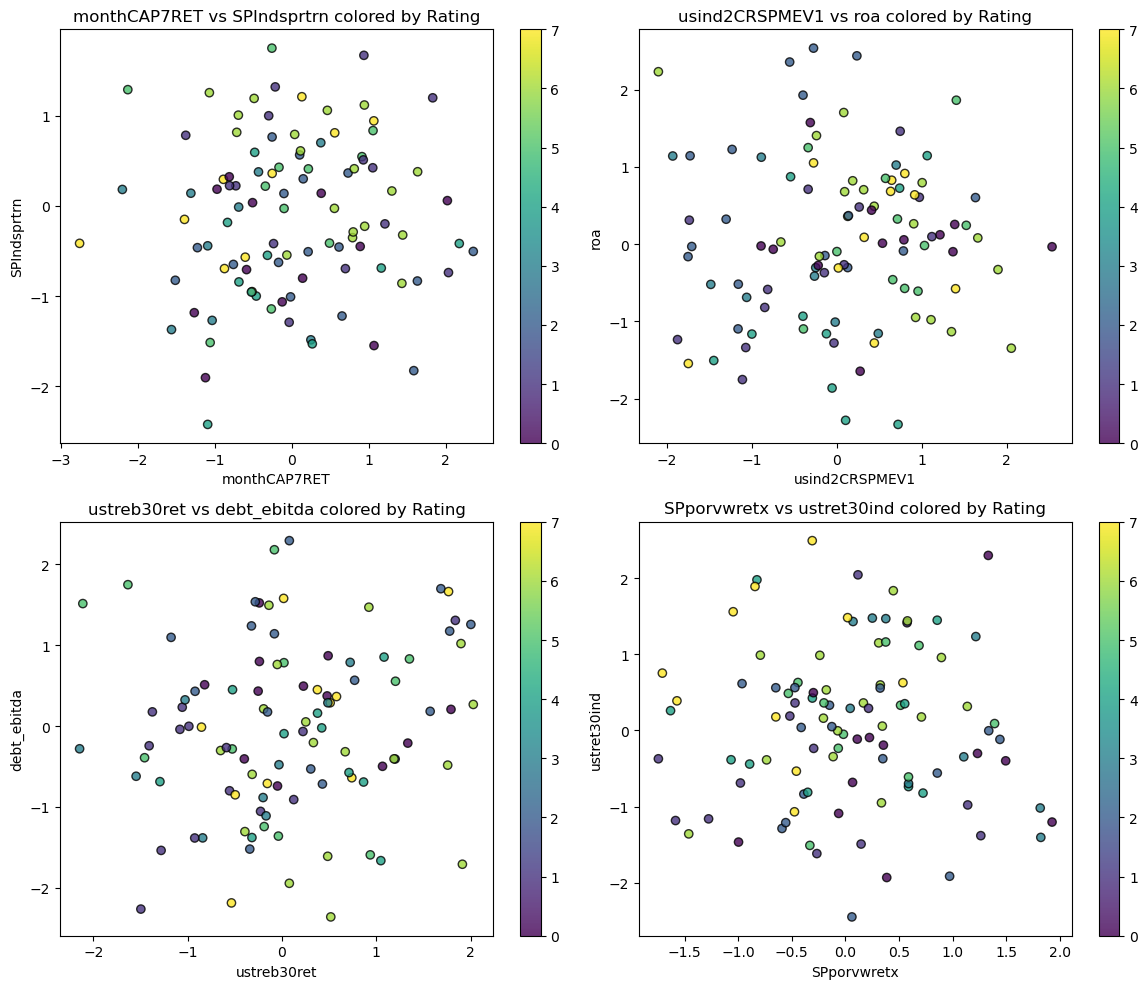

In [296]:
# Plotting scatter-plots against some combinations of these features and the ratings
feature_groups = [
    ['monthCAP7RET', 'SPIndsprtrn'],
    ['usind2CRSPMEV1', 'roa'],
    ['ustreb30ret','debt_ebitda'],
    ['SPporvwretx','ustret30ind']
]

total_plots = len(feature_groups)

cols = 2
rows = math.ceil(total_plots / cols)

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
axes = axes.flatten()

if total_plots == 1:
    axes = [axes]

for i, (x_feat, y_feat) in enumerate(feature_groups):
    scatter = axes[i].scatter(
        df[x_feat], df[y_feat],
        c=df[target+'_encoded'], cmap='viridis', edgecolor='k', alpha=0.8
    )
    axes[i].set_xlabel(x_feat)
    axes[i].set_ylabel(y_feat)
    axes[i].set_title(f'{x_feat} vs {y_feat} colored by {target}')
    plt.colorbar(scatter, ax=axes[i])

plt.tight_layout()
plt.show()

#### Insights
* No clear patterns or relationships observed in these scatter-plots but we can see lower ratings around the higher ends of these features.
* In other words, these indexes and returns might slightly be negatively impacting the ratings.

In [20]:
# Aggregating these highly correlated features across all the ratings
high_corr_agg = {c:'mean' for c in high_corr_cols}
agg_cols = [target]
df.groupby(agg_cols).agg(high_corr_agg).reset_index()

Rating  monthCAP7RET  SPIndusdcnt  SPIndsprtrn  SPporvwretx  usind2CRSPMEV1  \
0      A     -0.076984     0.220025    -0.575824     0.481537        0.526885   
1     A+      0.354062     0.288523     0.287138    -0.262098       -0.343936   
2     AA      0.246918    -0.462119    -0.423729     0.065145       -0.532861   
3    AA+     -0.858269     0.090721    -0.352807     0.811138       -0.525166   
4    AAA     -0.081940     0.811073    -0.798945    -0.234846       -0.095931   
5     BB     -0.152815     0.537764     0.217037     0.179287        0.628528   
6    BBB      0.454630     0.076807     0.344522     0.081383        0.495441   
7   BBB+     -0.556063    -0.680872     0.084739    -0.649803        0.313652   

   usind2CRSPLCV1  usind2CRSPLCVT  ustreb30ret  ustreb10ind  ustret30ind  \
0        0.106077        0.156266     0.282479    -0.216594    -0.390287   
1       -0.291030        0.066999    -0.628556     0.325707    -0.344117   
2        0.313172       -0.278365     0.408925     0.101721    -0.377457   
3        0.422230       -0.269274    -0.528053     0.584992     0.269164   
4       -0.752400       -0.094585     0.239120    -0.911858     0.125656   
5        0.101793        0.439561    -0.229466     0.548882     0.160304   
6       -0.271551       -0.100245     0.572320    -0.154086     0.361065   
7        0.128835        1.032190     0.194911    -0.352838     0.775621   

        roa  debt_ebitda  
0  0.025938     0.279274  
1 -0.284631    -0.489201  
2  0.660451     0.600681  
3 -0.089576    -0.372760  
4 -0.849525    -0.364816  
5  0.152250     0.249152  
6  0.258895    -0.330906  
7  0.048958    -0.005358

### Sentiment Prediction

In [21]:
# Importing the required libraries or libraries that may be of use
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from transformers import pipeline

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.isalpha()]
    return " ".join(tokens)

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [299]:
# Testing the textblob library for sentiment analysis
from textblob import TextBlob

df['clean_text'] = df['string_values'].apply(preprocess_text)

def get_sentiment_textblob(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

df['textblob_sentiment'] = df['clean_text'].apply(get_sentiment_textblob)

In [300]:
df['textblob_sentiment'].value_counts(dropna=False)

textblob_sentiment
positive    63
neutral     37
Name: count, dtype: int64

In [302]:
df[df['textblob_sentiment']=='positive']['string_values'].value_counts(dropna=False)

string_values
The company reported a steady increase in revenue, reflecting strong market demand.                                     31
The outlook remains positive, with expected growth in both domestic and international markets.                          23
Despite market volatility, the firm's financial position is strong, with solid liquidity and manageable debt levels.     9
Name: count, dtype: int64

In [303]:
df[df['textblob_sentiment']=='neutral']['string_values'].value_counts(dropna=False)

string_values
Challenges remain in the supply chain, but strategic investments in logistics are improving efficiencies.       23
Earnings before interest and taxes improved significantly from last year, driven by cost reduction measures.    14
Name: count, dtype: int64

In [24]:
# Trying Vader for the same
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

vader = SentimentIntensityAnalyzer()

def get_sentiment_vader(text):
    scores = vader.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['clean_text'].apply(get_sentiment_vader)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
df['vader_sentiment'].value_counts(dropna=False)

vader_sentiment
positive    100
Name: count, dtype: int64

In [28]:
# Testing a pre-trained transformer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

finbert = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# df['finbert_sentiment'] = df['clean_text'].apply(lambda x: finbert(x)[0]['label'])
df['finbert_sentiment'] = df['string_values'].apply(lambda x: finbert(x)[0]['label'])

In [29]:
df['finbert_sentiment'].value_counts(dropna=False)

finbert_sentiment
positive    100
Name: count, dtype: int64

In [31]:
# Using a pre-built transformer for some good quality sentence embeddings
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')  # or finetuned one
embeddings = model.encode(df['string_values'].tolist(), convert_to_numpy=True)

In [32]:
# Using these embeddings to fit an Isolation Forest for anomaly detection because all the sentences are somewhat positive
from sklearn.ensemble import IsolationForest

# clf = IsolationForest(contamination=0.1, random_state=42)
# clf = IsolationForest(contamination=0.46, random_state=42)
clf = IsolationForest(contamination=0.23, random_state=42)
df['anomaly_score'] = clf.fit_predict(embeddings)
df['anomaly_score'].value_counts(dropna=False)

anomaly_score
 1    77
-1    23
Name: count, dtype: int64

In [304]:
df[df['anomaly_score']==1]['string_values'].value_counts(dropna=False)

string_values
The company reported a steady increase in revenue, reflecting strong market demand.                          31
Challenges remain in the supply chain, but strategic investments in logistics are improving efficiencies.    23
The outlook remains positive, with expected growth in both domestic and international markets.               23
Name: count, dtype: int64

In [305]:
df[df['anomaly_score']==-1]['string_values'].value_counts(dropna=False)

string_values
Earnings before interest and taxes improved significantly from last year, driven by cost reduction measures.            14
Despite market volatility, the firm's financial position is strong, with solid liquidity and manageable debt levels.     9
Name: count, dtype: int64

#### Insights
* After cleaning the text and using libraries as well as pre-built transformers, the sentiment mostly seems to be positive.
* The statements on manual inspection seem to be mostly positive as well and so anomaly detection was done to find outliers that might be a little different from the actual data.
* The model classifies the statements into two groups and on inspecting the two groups, there seems to be a little difference between them. While one group seems to be confirm positive events happening, the other group seems to potray encouraging emotions and can be labelled as progressive but not confirmed as positive.  

In [38]:
# Classifying the model results as positive and progressive
df['text_sentiment'] = np.where(df['anomaly_score']==1,'Positive','Progressive')
df['text_sentiment'].value_counts(dropna=False)

text_sentiment
Positive       77
Progressive    23
Name: count, dtype: int64

### Topic Modelling

In [114]:
# Creating a LDA model to extract topics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

text_data = df['clean_text'].dropna().astype(str)

# Step 2: Vectorize text
vectorizer = CountVectorizer(
    stop_words='english',
    max_df=0.95,
    min_df=2
)
doc_term_matrix = vectorizer.fit_transform(text_data)

# Step 3: Fit LDA model
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [115]:
# Finding out dominant topic names
topic_distributions = lda.transform(doc_term_matrix)
dominant_topics = topic_distributions.argmax(axis=1)

df.loc[text_data.index, 'dominant_topic'] = dominant_topics

# Extracting top 5 most relevant words for each topic
def get_topic_keywords(lda_model, feature_names, top_n=5):
    topic_keywords = []
    for topic_idx, topic in enumerate(lda_model.components_):
        top_indices = topic.argsort()[:-top_n - 1:-1]
        keywords = [feature_names[i] for i in top_indices]
        topic_keywords.append(', '.join(keywords))
    return topic_keywords

# Getting readable topic names
feature_names = vectorizer.get_feature_names_out()
topic_names = get_topic_keywords(lda, feature_names)

# Mapping dominant topic index to topic name
df.loc[text_data.index, 'dominant_topic_name'] = df.loc[text_data.index, 'dominant_topic'].map(lambda i: topic_names[int(i)])

In [165]:
# Using vader to get sentiment for each of the keywords
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def get_sentiment(word):
    score = sia.polarity_scores(word)['compound']
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

def tag_keywords_as_sentiment(keyword_str):
    words = [w.strip() for w in keyword_str.split(',')]
    words = list(set(words))
    tagged = {word: get_sentiment(word) for word in words}
    no_pos = sum([1 if get_sentiment(word)=='positive' else 0 for word in words])
    no_neg = sum([1 if get_sentiment(word)=='negative' else 0 for word in words])
    no_neu = sum([1 if get_sentiment(word)=='neutral' else 0 for word in words])

    pos_words = ', '.join([word for word in words if get_sentiment(word)=='positive'])
    neg_words = ', '.join([word for word in words if get_sentiment(word)=='negative'])
    neu_words = ', '.join([word for word in words if get_sentiment(word)=='neutral'])
    return tagged, no_pos, no_neg, no_neu, pos_words, neg_words, neu_words

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [170]:
# Creating some features from the sentiment of these keywords
df['keyword_sentiments_tuple'] = df['dominant_topic_name'].apply(tag_keywords_as_sentiment)
df['keyword_sentiments'] = df['keyword_sentiments_tuple'].apply(lambda x : x[0])

df['positive_keywords_count'] = df['keyword_sentiments_tuple'].apply(lambda x : x[1])
df['negative_keywords_count'] = df['keyword_sentiments_tuple'].apply(lambda x : x[2])
df['neutral_keywords_count'] = df['keyword_sentiments_tuple'].apply(lambda x : x[3])

df['positive_keywords'] = df['keyword_sentiments_tuple'].apply(lambda x : x[4])
df['negative_keywords'] = df['keyword_sentiments_tuple'].apply(lambda x : x[5])
df['neutral_keywords'] = df['keyword_sentiments_tuple'].apply(lambda x : x[6])

# Creating a ratio of the positive keywords by all words in a statement
df['positive_keywords_ratio'] = df.apply(lambda x : x['positive_keywords_count']/(x['positive_keywords_count']+x['negative_keywords_count']+x['neutral_keywords_count']), axis=1)
df['positive_keywords_ratio'].value_counts(dropna=False)

positive_keywords_ratio
0.2    54
0.4    23
0.0    23
Name: count, dtype: int64

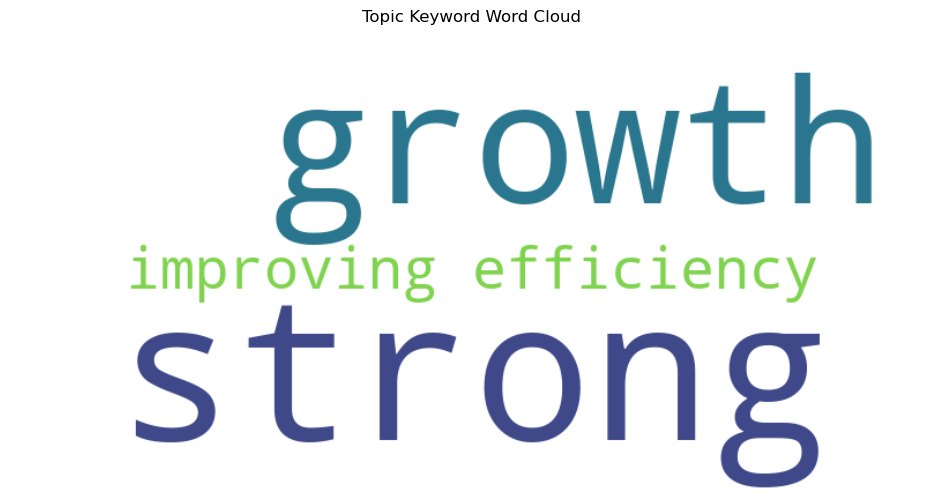

In [160]:
# Plotting a word cloud of only the positive words
from wordcloud import WordCloud

all_keywords = df['positive_keywords'].dropna().str.cat(sep=', ')

all_keywords = ' '.join(word.strip() for word in all_keywords.split(','))

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_keywords)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Topic Keyword Word Cloud")
plt.show()

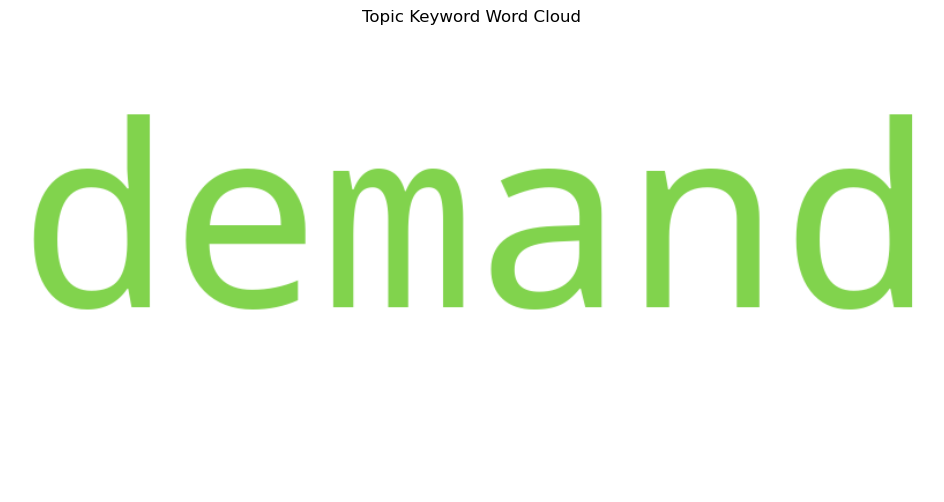

In [161]:
# Plotting a word cloud of only the negative words
all_keywords = df['negative_keywords'].dropna().str.cat(sep=', ')

all_keywords = ' '.join(word.strip() for word in all_keywords.split(','))

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_keywords)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Topic Keyword Word Cloud")
plt.show()

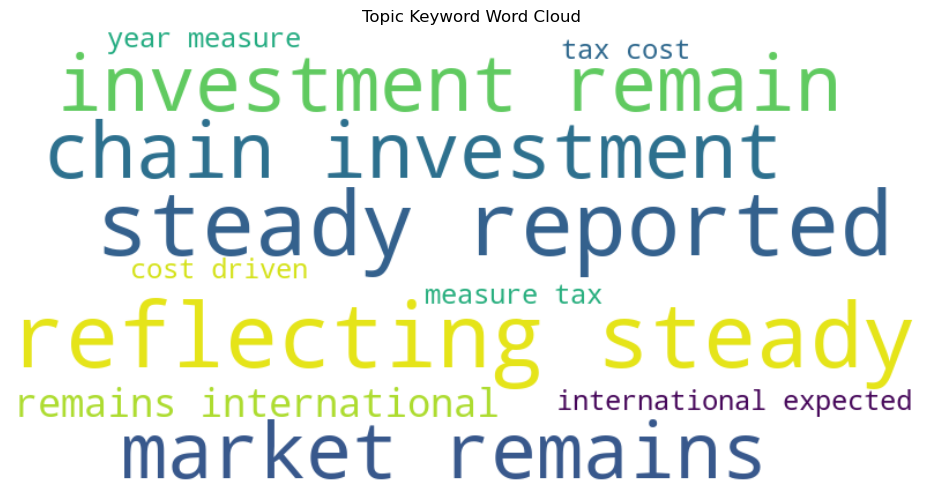

In [162]:
# Plotting a word cloud of only the neutral words
all_keywords = df['neutral_keywords'].dropna().str.cat(sep=', ')

all_keywords = ' '.join(word.strip() for word in all_keywords.split(','))

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_keywords)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Topic Keyword Word Cloud")
plt.show()

#### Insights
* After extracting topics from these statements and exploring their most relevant keywords, Vader was used to derive their sentiments.
* The word clouds for positive and neutral sentiments seem to be relevant as most of these words belong to their respective categories of emotions.
* Vader predicts only 1 words as negative and thus, there is more room for improvment here.

### Feature Engineering and Selection

In [41]:
# Scaling features that have a moderate skew to test out in the models and log-transforming columns that are 
# close to a normal distribution
high_skew = desc_df[(desc_df['skew']>0.5)|(desc_df['skew']<-0.5)].index.tolist()
std_cols = [c for c in desc_df.index if c not in high_skew]

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()  # or MinMaxScaler(), or RobustScaler()

for col in std_cols:
    df[col+'_scaled'] = scaler.fit_transform(df[[col]])

for col in high_skew:
    df[col+'_log'] = df[col].apply(lambda x : np.log1p(x))

In [43]:
# Doing PCA to try out in the model as well
scaled_cols = [c for c in df.columns if '_scaled' in c and 'index_y' not in c]
print (len(scaled_cols))
pca = PCA(n_components=0.95)
pca_df = pca.fit_transform(df[scaled_cols])

141


### Model Creation

In [248]:
# Importing required libraries or libraries that may be used
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    precision_recall_fscore_support,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import label_binarize
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline as SklearnPipeline
from imblearn.over_sampling import SMOTE, SMOTENC
import traceback

In [200]:
# Function to create and plot evaluation metrics like precision, recall, f1-score and the confusion matrix
def report_metrics(y_true, y_pred, y_proba, dataset_label):
    print(f"\n--- {dataset_label} Metrics ---")
    print(classification_report(y_true, y_pred))

    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='macro', zero_division=0)
    print(f"Macro Precision: {precision:.4f}")
    print(f"Macro Recall:    {recall:.4f}")
    print(f"Macro F1 Score:  {f1:.4f}")

    try:
        y_true_bin = label_binarize(y_true, classes=np.unique(y))
        auc_macro = roc_auc_score(y_true_bin, y_proba, average='macro', multi_class='ovr')
        gini_macro = 2 * auc_macro - 1
        print(f"Macro AUC:       {auc_macro:.4f}")
        print(f"Gini (AUC x2 - 1): {gini_macro:.4f}")
    except Exception as e:
        traceback.print_exc()

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - {dataset_label} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Creating an autmated function to do the pre-processing or use techniques like SMOTE, cross-validation and 
# finally, train the model and use it for prediction
def evaluate_model_with_pipeline(model, name, categorical_cols, cv_folds=5, use_smote=False, use_smote_nc=False):
    if use_smote_nc:
        if isinstance(categorical_cols, list):
            cat_indices = [X_train.columns.get_loc(col) for col in categorical_cols]
        else:
            cat_indices = categorical_cols
        smote_step = SMOTENC(categorical_features=cat_indices, k_neighbors=2, random_state=42)
    elif use_smote:
        smote_step = SMOTE(random_state=42, k_neighbors=2)
    else:
        smote_step = None

    if smote_step:
        pipeline = ImbPipeline([
            ("preprocessor", preprocessor),
            ("smote", smote_step),
            ("classifier", model)
        ])
    else:
        pipeline = SklearnPipeline([
            ("preprocessor", preprocessor),
            ("classifier", model)
        ])


     # --- N-Fold Cross-Validation ---
    print("\n--- Cross-Validation ---")

    cv_results = cross_validate(
        pipeline, X_train, y_train,
        cv=cv_folds,
        scoring="accuracy",
        return_train_score=True
    )

    cv_df = pd.DataFrame({
        "Fold": np.arange(1, cv_folds + 1),
        "Train Accuracy": cv_results["train_score"],
        "Validation Accuracy": cv_results["test_score"]
    })

    cv_df["Gap (Train - Val)"] = cv_df["Train Accuracy"] - cv_df["Validation Accuracy"]
    print(cv_df.round(4))

    print("\nCV Accuracy Summary:")
    print(f"Train: Mean = {cv_df['Train Accuracy'].mean():.4f}, Std = {cv_df['Train Accuracy'].std():.4f}")
    print(f"Val:   Mean = {cv_df['Validation Accuracy'].mean():.4f}, Std = {cv_df['Validation Accuracy'].std():.4f}")
    print(f"Avg Gap: {cv_df['Gap (Train - Val)'].mean():.4f}")
    
    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    y_train_proba = pipeline.predict_proba(X_train)
    y_test_proba = pipeline.predict_proba(X_test)

    # Cross-validation on training set
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    print(f"\n=== {name} ===")
    print(f"CV Accuracy (Train set, mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # Train metrics
    report_metrics(y_train, y_train_pred, y_train_proba, "Train")
    
    # Test metrics
    report_metrics(y_test, y_test_pred, y_test_proba, "Test")

    # --- Feature Importances ---
    final_model = pipeline.named_steps["classifier"]
    preprocessor_fit = pipeline.named_steps["preprocessor"]

    print("\n--- Feature Importances ---")
    try:
        feature_names = pipeline.named_steps["preprocessor"].get_feature_names_out()
    
        if hasattr(final_model, "feature_importances_"):
            importances = final_model.feature_importances_
        elif hasattr(final_model, "coef_"):
            importances = np.mean(np.abs(final_model.coef_), axis=0)
        else:
            importances = None
            print("This model does not support feature importances.")
    
        if importances is not None:
            imp_df = pd.DataFrame({
                "Feature": feature_names,
                "Importance": importances
            }).sort_values(by="Importance", ascending=False)
    
            print (imp_df)
        else:
            print("Feature importance not available for this model.")
    
    except Exception as e:
        traceback.print_exc()

In [201]:
# Creating a list of only pre-processed features
scaled_cols = [c for c in df.columns if '_scaled' in c or '_log' in c and 'index_y' not in c]
print (len(scaled_cols))

151


In [310]:
# CANDIDATE 1 - ONLY STRUCTURED DATA FEATURES
final_cat_cols = []
final_num_cols = scaled_cols # trying to add only scaled and log-transformed features into the model
final_num_cols = num_cols # trying to features as they are into the model
final_num_cols = high_corr_cols # trying to add only highly correlated features into the model

# CANDIDATE 2 - ONLY TEXT RELATED FEATURES
final_num_cols = ['positive_keywords_ratio']
final_cat_cols = ['text_sentiment']

# CANDIDATE 3 - MIX OF BOTH STRUCTURED DATA FEATURES AND TEXT FEATURES
final_cat_cols = ['text_sentiment']
# final_num_cols = scaled_cols + ['positive_keywords_ratio'] # using pre-processed structured features and numerical text features 
# final_num_cols = num_cols + ['positive_keywords_ratio'] # using raw structured features and numerical text feeatures
final_num_cols = high_corr_cols + ['positive_keywords_ratio'] # using highly correlated features and numerical text features

# FINAL FEATURES
final_cols = final_num_cols + final_cat_cols # adding numerical and categorical columns
print (len(final_cols))

# Manually setting a few model parameters as per the initial model performance and the data at hand
rf_params = {'n_estimators' : 100, 'max_depth' : 4, 'class_weight' : 'balanced', 'random_state' : 42}
dt_params = {'max_depth' : 4, 'class_weight' : 'balanced', 'random_state' :42}
# max_iter=300 # trying different values of max_iter
max_iter=1000

# Creating a dictionary of all the models to be tested for these candidates
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced',C=0.1,
                                              max_iter=max_iter, multi_class='multinomial', solver='lbfgs'),
    "Decision Tree": DecisionTreeClassifier(**dt_params),
    "Random Forest": RandomForestClassifier(**rf_params)
}

14


14

--- Cross-Validation ---
   Fold  Train Accuracy  Validation Accuracy  Gap (Train - Val)
0     1          0.7857               0.2143             0.5714
1     2          0.6786               0.2857             0.3929
2     3          0.6964               0.1429             0.5536
3     4          0.5714               0.4286             0.1429
4     5          0.6071               0.5714             0.0357

CV Accuracy Summary:
Train: Mean = 0.6679, Std = 0.0834
Val:   Mean = 0.3286, Std = 0.1720
Avg Gap: 0.3393

=== Logistic Regression ===
CV Accuracy (Train set, mean ± std): 0.3286 ± 0.1539

--- Train Metrics ---
              precision    recall  f1-score   support

           A       0.40      0.50      0.44         8
          A+       0.50      0.40      0.44        10
          AA       0.80      0.73      0.76        11
         AA+       0.57      0.67      0.62         6
         AAA       0.71      0.71      0.71         7
          BB       0.44      0.50      0.47      

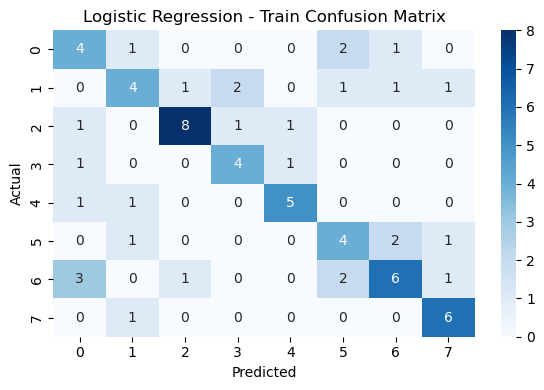


--- Test Metrics ---
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         4
          A+       1.00      0.25      0.40         4
          AA       0.67      0.40      0.50         5
         AA+       0.60      1.00      0.75         3
         AAA       0.25      0.33      0.29         3
          BB       0.25      0.33      0.29         3
         BBB       0.60      0.60      0.60         5
        BBB+       0.33      0.33      0.33         3

    accuracy                           0.40        30
   macro avg       0.46      0.41      0.39        30
weighted avg       0.49      0.40      0.40        30

Macro Precision: 0.4625
Macro Recall:    0.4062
Macro F1 Score:  0.3943
Macro AUC:       0.8061
Gini (AUC x2 - 1): 0.6122


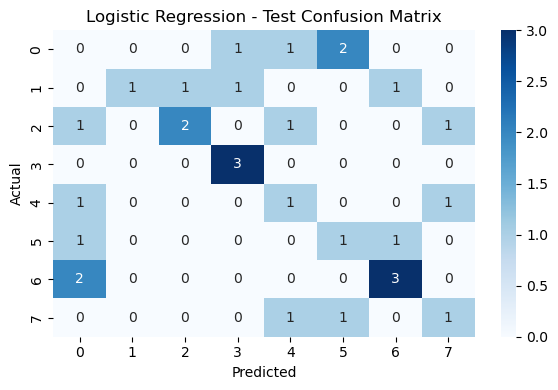


--- Feature Importances ---
                            Feature  Importance
4               num__usind2CRSPMEV1    0.278823
10                         num__roa    0.217967
1                  num__SPIndusdcnt    0.210682
5               num__usind2CRSPLCV1    0.204065
3                  num__SPporvwretx    0.187820
2                  num__SPIndsprtrn    0.181879
6               num__usind2CRSPLCVT    0.180549
0                 num__monthCAP7RET    0.175792
7                  num__ustreb30ret    0.161595
11                 num__debt_ebitda    0.157384
8                  num__ustreb10ind    0.152009
9                  num__ustret30ind    0.138904
13  cat__text_sentiment_Progressive    0.106873
12     num__positive_keywords_ratio    0.034873

--- Cross-Validation ---
   Fold  Train Accuracy  Validation Accuracy  Gap (Train - Val)
0     1          0.6429               0.0000             0.6429
1     2          0.6071               0.0714             0.5357
2     3          0.4821          

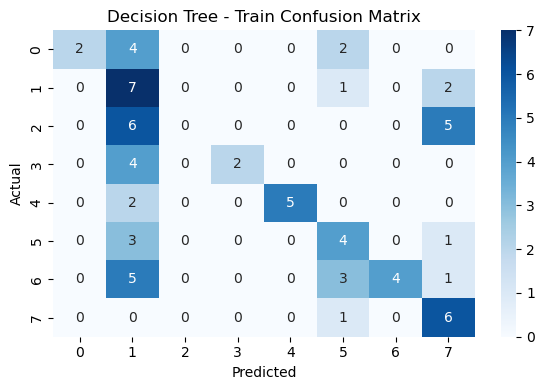


--- Test Metrics ---
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         4
          A+       0.14      0.50      0.22         4
          AA       0.00      0.00      0.00         5
         AA+       0.00      0.00      0.00         3
         AAA       0.00      0.00      0.00         3
          BB       0.00      0.00      0.00         3
         BBB       0.00      0.00      0.00         5
        BBB+       0.14      0.33      0.20         3

    accuracy                           0.10        30
   macro avg       0.04      0.10      0.05        30
weighted avg       0.03      0.10      0.05        30

Macro Precision: 0.0357
Macro Recall:    0.1042
Macro F1 Score:  0.0528
Macro AUC:       0.5226
Gini (AUC x2 - 1): 0.0453


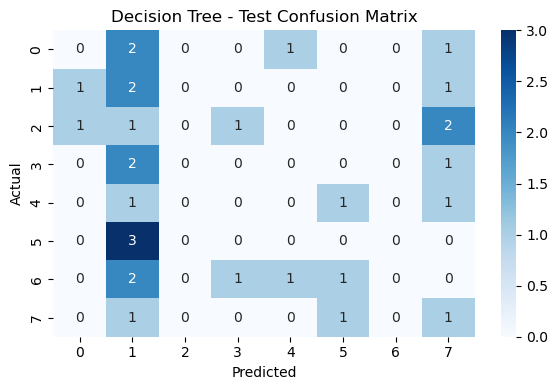


--- Feature Importances ---
                            Feature  Importance
8                  num__ustreb10ind    0.347203
10                         num__roa    0.274939
4               num__usind2CRSPMEV1    0.144399
1                  num__SPIndusdcnt    0.139640
9                  num__ustret30ind    0.093819
0                 num__monthCAP7RET    0.000000
2                  num__SPIndsprtrn    0.000000
3                  num__SPporvwretx    0.000000
5               num__usind2CRSPLCV1    0.000000
6               num__usind2CRSPLCVT    0.000000
7                  num__ustreb30ret    0.000000
11                 num__debt_ebitda    0.000000
12     num__positive_keywords_ratio    0.000000
13  cat__text_sentiment_Progressive    0.000000

--- Cross-Validation ---
   Fold  Train Accuracy  Validation Accuracy  Gap (Train - Val)
0     1          0.9821               0.0714             0.9107
1     2          0.9821               0.2143             0.7679
2     3          0.9821          

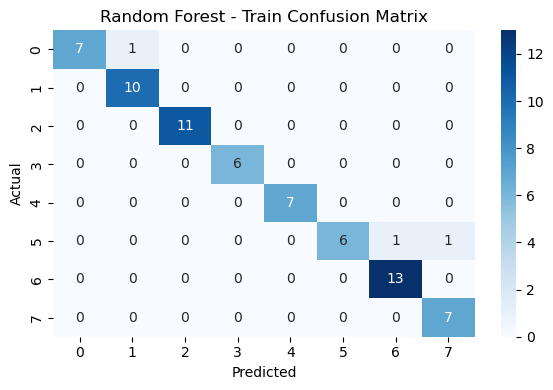


--- Test Metrics ---
              precision    recall  f1-score   support

           A       0.25      0.25      0.25         4
          A+       1.00      0.25      0.40         4
          AA       1.00      0.60      0.75         5
         AA+       0.50      0.33      0.40         3
         AAA       0.25      0.33      0.29         3
          BB       0.50      0.67      0.57         3
         BBB       0.57      0.80      0.67         5
        BBB+       0.20      0.33      0.25         3

    accuracy                           0.47        30
   macro avg       0.53      0.45      0.45        30
weighted avg       0.57      0.47      0.47        30

Macro Precision: 0.5339
Macro Recall:    0.4458
Macro F1 Score:  0.4467
Macro AUC:       0.6930
Gini (AUC x2 - 1): 0.3860


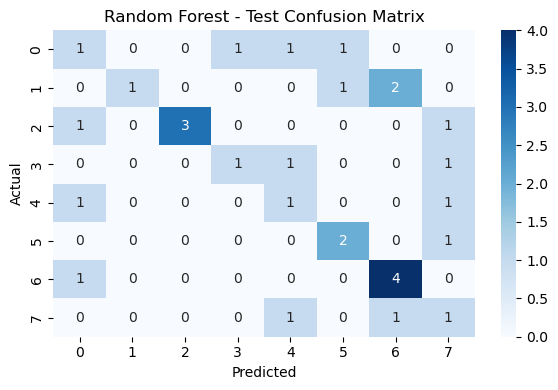


--- Feature Importances ---
                            Feature  Importance
10                         num__roa    0.125905
4               num__usind2CRSPMEV1    0.119141
1                  num__SPIndusdcnt    0.096385
9                  num__ustret30ind    0.080508
5               num__usind2CRSPLCV1    0.079530
2                  num__SPIndsprtrn    0.074944
3                  num__SPporvwretx    0.069738
0                 num__monthCAP7RET    0.068701
7                  num__ustreb30ret    0.064355
6               num__usind2CRSPLCVT    0.062674
8                  num__ustreb10ind    0.061323
11                 num__debt_ebitda    0.046633
12     num__positive_keywords_ratio    0.033011
13  cat__text_sentiment_Progressive    0.017151


In [311]:
n_components = 20
# n_components = 40

preprocessor = ColumnTransformer(
    transformers=[
        # trying scaling :
        # ("num", Pipeline([
        #     # ("scaler", StandardScaler()),
        # trying PCA :
        #     # ("pca", PCA(n_components=n_components))
        # ]), scaled_cols),
        ("num", "passthrough", final_num_cols),
        ("cat", OneHotEncoder(drop="first"), final_cat_cols)
    ]
)

print (len(final_cols))
X = df[final_cols].fillna(0)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# use_smote = False
use_smote = True

# use_smote_nc = False
use_smote_nc = True

# Run all models
for name, model in models.items():
    evaluate_model_with_pipeline(model, name, final_cat_cols, use_smote=use_smote)
    # evaluate_model_with_pipeline(model, name, final_cat_cols, use_smote_nc=use_smote_nc)

#### Insights
* Various iterations of using pre-processed features, raw features and highly correlated features were done and finally it is best to use only the highly correlated features without any pre-processing to achieve minimal over-fitting with good precision, recall and AUC.
* Using the SMOTE technique to oversample the minority classes helps in reducing the overfitting further.

##### Candidate 1
* Log reg metrics : train auc : 0.91, test auc : 0.79, avg accuracy gap through CV (n=5) : 0.35
* DT metrics : train auc : 0.81, test auc : 0.56, avg accuracy gap through CV (n=5) : 0.42
* RF metrics : train auc : 0.99, test auc : 0.75, avg accuracy gap through CV (n=5) : 0.73

##### Candidate 2
* Log reg metrics : train auc : 0.59, test auc : 0.6, avg accuracy gap through CV (n=5) : 0.03
* DT metrics : train auc : 0.62, test auc : 0.58, avg accuracy gap through CV (n=5) : 0.06
* RF metrics : train auc : 0.62, test auc : 0.58, avg accuracy gap through CV (n=5) : 0.05

##### Candidate 3
* Log reg metrics : train auc : 0.92, test auc : 0.81, avg accuracy gap through CV (n=5) : 0.34
* DT metrics : train auc : 0.81, test auc : 0.52, avg accuracy gap through CV (n=5) : 0.43
* RF metrics : train auc : 0.99, test auc : 0.7, avg accuracy gap through CV (n=5) : 0.77

### Final Candidates

14

--- Cross-Validation ---
   Fold  Train Accuracy  Validation Accuracy  Gap (Train - Val)
0     1          0.7679               0.2143             0.5536
1     2          0.6964               0.2857             0.4107
2     3          0.6964               0.1429             0.5536
3     4          0.5714               0.3571             0.2143
4     5          0.6250               0.5714             0.0536

CV Accuracy Summary:
Train: Mean = 0.6714, Std = 0.0753
Val:   Mean = 0.3143, Std = 0.1644
Avg Gap: 0.3571

=== Logistic Regression ===
CV Accuracy (Train set, mean ± std): 0.3143 ± 0.1471

--- Train Metrics ---
              precision    recall  f1-score   support

           A       0.38      0.38      0.38         8
          A+       0.44      0.40      0.42        10
          AA       0.73      0.73      0.73        11
         AA+       0.67      0.67      0.67         6
         AAA       0.71      0.71      0.71         7
          BB       0.44      0.50      0.47      

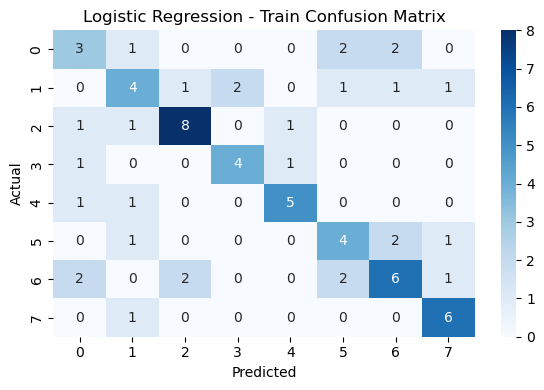


--- Test Metrics ---
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         4
          A+       0.50      0.25      0.33         4
          AA       0.50      0.40      0.44         5
         AA+       0.60      1.00      0.75         3
         AAA       0.33      0.33      0.33         3
          BB       0.25      0.33      0.29         3
         BBB       0.67      0.80      0.73         5
        BBB+       0.33      0.33      0.33         3

    accuracy                           0.43        30
   macro avg       0.40      0.43      0.40        30
weighted avg       0.41      0.43      0.41        30

Macro Precision: 0.3979
Macro Recall:    0.4312
Macro F1 Score:  0.4009
Macro AUC:       0.7963
Gini (AUC x2 - 1): 0.5927


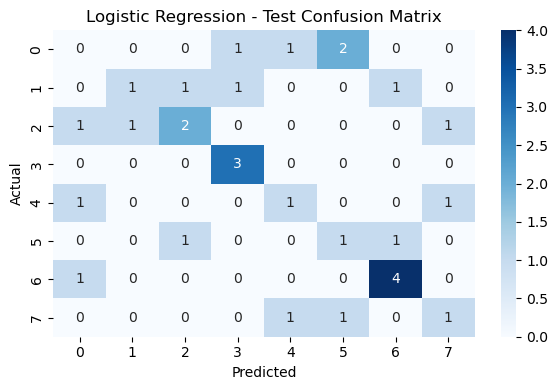


--- Feature Importances ---
                Feature  Importance
4   num__usind2CRSPMEV1    0.283450
10             num__roa    0.219882
1      num__SPIndusdcnt    0.211907
5   num__usind2CRSPLCV1    0.206086
3      num__SPporvwretx    0.187368
2      num__SPIndsprtrn    0.182647
6   num__usind2CRSPLCVT    0.180480
0     num__monthCAP7RET    0.177887
7      num__ustreb30ret    0.160506
11     num__debt_ebitda    0.157553
8      num__ustreb10ind    0.152955
9      num__ustret30ind    0.140614


In [204]:
# CANDIDATE 1 - ONLY STRUCTURED DATA FEATURES
use_smote = True
final_cat_cols = []
final_num_cols = high_corr_cols
max_iter=1000
models = {"Logistic Regression": 
          LogisticRegression(class_weight='balanced',C=0.1,max_iter=max_iter, multi_class='multinomial', solver='lbfgs')}

n_components = 20
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", final_num_cols),
        ("cat", OneHotEncoder(drop="first"), final_cat_cols)
    ]
)

print (len(final_cols))
X = df[final_cols].fillna(0)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

for name, model in models.items():
    evaluate_model_with_pipeline(model, name, final_cat_cols, use_smote=use_smote)

14

--- Cross-Validation ---
   Fold  Train Accuracy  Validation Accuracy  Gap (Train - Val)
0     1          0.2143               0.1429             0.0714
1     2          0.2143               0.1429             0.0714
2     3          0.1786               0.2143            -0.0357
3     4          0.2500               0.0714             0.1786
4     5          0.1964               0.2143            -0.0179

CV Accuracy Summary:
Train: Mean = 0.2107, Std = 0.0265
Val:   Mean = 0.1571, Std = 0.0598
Avg Gap: 0.0536

=== Random Forest ===
CV Accuracy (Train set, mean ± std): 0.1571 ± 0.0535

--- Train Metrics ---
              precision    recall  f1-score   support

           A       0.16      0.75      0.26         8
          A+       0.00      0.00      0.00        10
          AA       0.33      0.55      0.41        11
         AA+       0.00      0.00      0.00         6
         AAA       0.00      0.00      0.00         7
          BB       0.21      0.38      0.27         8
 

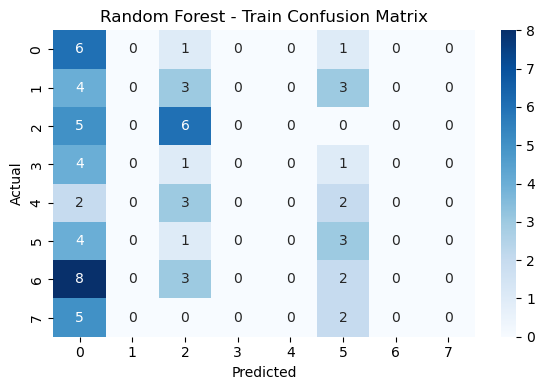


--- Test Metrics ---
              precision    recall  f1-score   support

           A       0.12      0.50      0.20         4
          A+       0.00      0.00      0.00         4
          AA       0.40      0.40      0.40         5
         AA+       0.00      0.00      0.00         3
         AAA       0.00      0.00      0.00         3
          BB       0.22      0.67      0.33         3
         BBB       0.00      0.00      0.00         5
        BBB+       0.00      0.00      0.00         3

    accuracy                           0.20        30
   macro avg       0.09      0.20      0.12        30
weighted avg       0.11      0.20      0.13        30

Macro Precision: 0.0934
Macro Recall:    0.1958
Macro F1 Score:  0.1167
Macro AUC:       0.5767
Gini (AUC x2 - 1): 0.1535


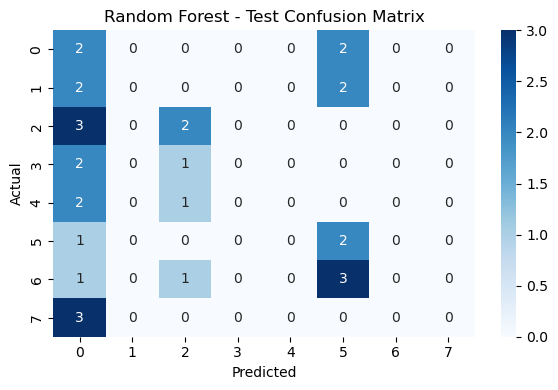


--- Feature Importances ---
                           Feature  Importance
0     num__positive_keywords_ratio    0.640254
1  cat__text_sentiment_Progressive    0.359746


In [205]:
# CANDIDATE 2 - ONLY TEXT FEATURES
use_smote = True
final_num_cols = ['positive_keywords_ratio']
final_cat_cols = ['text_sentiment']
rf_params = {'n_estimators' : 100, 'max_depth' : 4, 'class_weight' : 'balanced', 'random_state' : 42}
models = {"Random Forest": RandomForestClassifier(**rf_params)}

n_components = 20
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", final_num_cols),
        ("cat", OneHotEncoder(drop="first"), final_cat_cols)
    ]
)

print (len(final_cols))
X = df[final_cols].fillna(0)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

for name, model in models.items():
    evaluate_model_with_pipeline(model, name, final_cat_cols, use_smote=use_smote)

14

--- Cross-Validation ---
   Fold  Train Accuracy  Validation Accuracy  Gap (Train - Val)
0     1          0.7857               0.2143             0.5714
1     2          0.6786               0.2857             0.3929
2     3          0.6964               0.1429             0.5536
3     4          0.5714               0.4286             0.1429
4     5          0.6071               0.5714             0.0357

CV Accuracy Summary:
Train: Mean = 0.6679, Std = 0.0834
Val:   Mean = 0.3286, Std = 0.1720
Avg Gap: 0.3393

=== Logistic Regression ===
CV Accuracy (Train set, mean ± std): 0.3286 ± 0.1539

--- Train Metrics ---
              precision    recall  f1-score   support

           A       0.40      0.50      0.44         8
          A+       0.50      0.40      0.44        10
          AA       0.80      0.73      0.76        11
         AA+       0.57      0.67      0.62         6
         AAA       0.71      0.71      0.71         7
          BB       0.44      0.50      0.47      

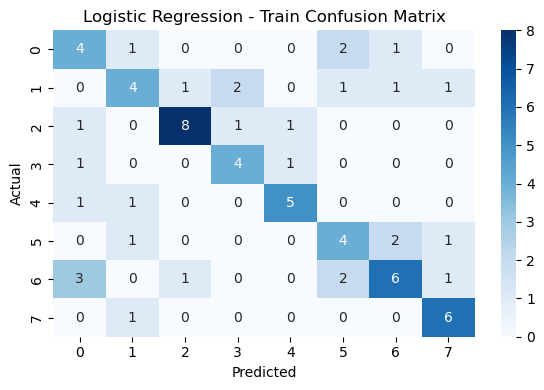


--- Test Metrics ---
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         4
          A+       1.00      0.25      0.40         4
          AA       0.67      0.40      0.50         5
         AA+       0.60      1.00      0.75         3
         AAA       0.25      0.33      0.29         3
          BB       0.25      0.33      0.29         3
         BBB       0.60      0.60      0.60         5
        BBB+       0.33      0.33      0.33         3

    accuracy                           0.40        30
   macro avg       0.46      0.41      0.39        30
weighted avg       0.49      0.40      0.40        30

Macro Precision: 0.4625
Macro Recall:    0.4062
Macro F1 Score:  0.3943
Macro AUC:       0.8061
Gini (AUC x2 - 1): 0.6122


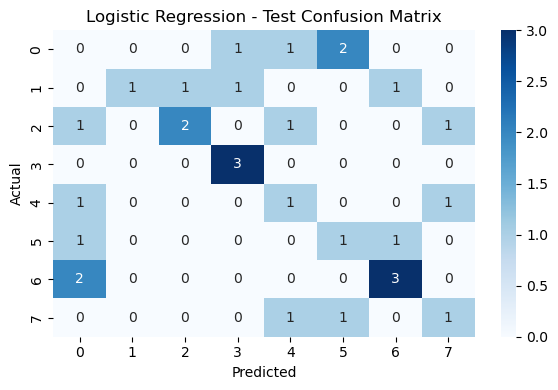


--- Feature Importances ---
                            Feature  Importance
4               num__usind2CRSPMEV1    0.278823
10                         num__roa    0.217967
1                  num__SPIndusdcnt    0.210682
5               num__usind2CRSPLCV1    0.204065
3                  num__SPporvwretx    0.187820
2                  num__SPIndsprtrn    0.181879
6               num__usind2CRSPLCVT    0.180549
0                 num__monthCAP7RET    0.175792
7                  num__ustreb30ret    0.161595
11                 num__debt_ebitda    0.157384
8                  num__ustreb10ind    0.152009
9                  num__ustret30ind    0.138904
13  cat__text_sentiment_Progressive    0.106873
12     num__positive_keywords_ratio    0.034873


In [206]:
# CANDIDATE 3 - STRUCTURED DATA FEATURES AND TEXT FEATURES
use_smote = True
final_cat_cols = ['text_sentiment']
final_num_cols = high_corr_cols + ['positive_keywords_ratio']
max_iter=1000
models = {"Logistic Regression": 
          LogisticRegression(class_weight='balanced',C=0.1,max_iter=max_iter, multi_class='multinomial', solver='lbfgs')}

n_components = 20
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", final_num_cols),
        ("cat", OneHotEncoder(drop="first"), final_cat_cols)
    ]
)

print (len(final_cols))
X = df[final_cols].fillna(0)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

for name, model in models.items():
    evaluate_model_with_pipeline(model, name, final_cat_cols, use_smote=use_smote)

#### Comparative Analysis
* Candidate 1 best model (Log reg) : train auc : 0.91, test auc : 0.79, avg accuracy gap through CV (n=5) : 0.35
* Candidate 2 best model (RF) : train auc : 0.62, test auc : 0.58, avg accuracy gap through CV (n=5) : 0.05
* Candidate 3 best model (Log reg) : train auc : 0.92, test auc : 0.81, avg accuracy gap through CV (n=5) : 0.34

#### Final Selection : 
* On comparing these 3 candidates, the mixed model has the best performance metrics although it has high over-fitting. That can be attributed to a very small training set.
* Although using only the text features can resolve the overfitting issue, the performance metrics are very low.

### Model Analysis

In [246]:
# CANDIDATE 3 - STRUCTURED DATA FEATURES AND TEXT FEATURES
use_smote = True
final_cat_cols = ['text_sentiment']
final_num_cols = high_corr_cols + ['positive_keywords_ratio']
max_iter=1000
models = {"Logistic Regression": 
          LogisticRegression(class_weight='balanced',C=0.1,max_iter=max_iter, multi_class='multinomial', solver='lbfgs')}

n_components = 20
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", final_num_cols),
        ("cat", OneHotEncoder(drop="first"), final_cat_cols)
    ]
)

print (len(final_cols))
X = df[final_cols].fillna(0)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

14


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l2'}

--- Complete Metrics ---
              precision    recall  f1-score   support

           A       0.50      0.17      0.25        12
          A+       0.44      0.29      0.35        14
          AA       0.53      0.56      0.55        16
         AA+       0.50      0.78      0.61         9
         AAA       0.38      0.80      0.52        10
          BB       0.57      0.36      0.44        11
         BBB       0.64      0.50      0.56        18
        BBB+       0.50      0.70      0.58        10

    accuracy                           0.50       100
   macro avg       0.51      0.52      0.48       100
weighted avg       0.52      0.50      0.48       100

Macro Precision: 0.5086
Macro Recall:    0.5195
Macro F1 Score:  0.4823
Macro AUC:       0.8859
Gini (AUC x2 - 1): 0.7718


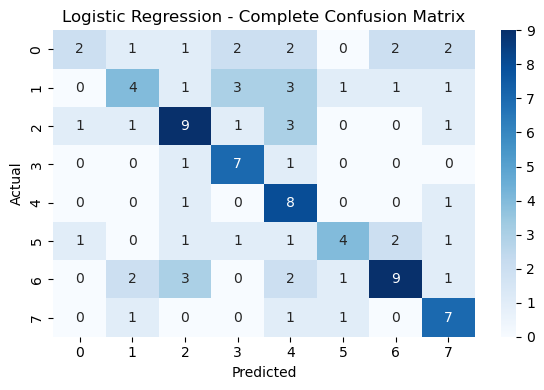


--- Cross-Validation ---
   Fold  Train Accuracy  Validation Accuracy  Gap (Train - Val)
0     1          0.6786               0.2857             0.3929
1     2          0.6071               0.3571             0.2500
2     3          0.6607               0.1429             0.5179
3     4          0.5357               0.4286             0.1071
4     5          0.6071               0.5000             0.1071

CV Accuracy Summary:
Train: Mean = 0.6179, Std = 0.0559
Val:   Mean = 0.3429, Std = 0.1374
Avg Gap: 0.2750


In [260]:
# Get categorical column indices (used for custom transformers if needed)
cat_indices = [X.columns.get_loc(col) for col in final_cat_cols]

# Define SMOTE
smote_step = SMOTE(random_state=42, k_neighbors=2)

# Define pipeline
pipeline = ImbPipeline([
    ("preprocessor", preprocessor),
    ("smote", smote_step),
    ("classifier", model)
])

# Example param grid for Logistic Regression
param_grid = {
    'classifier__penalty': ['l2'],
    'classifier__C': [0.01, 0.1, 1, 10]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',  # or 'f1', 'roc_auc', etc.
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit and predict
grid_search.fit(X, y)

# Best model and predictions
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X)
y_proba = best_pipeline.predict_proba(X)

# Report
print("Best Parameters:", grid_search.best_params_)
# print(classification_report(y, y_pred))
report_metrics(y, y_pred, y_proba, "Complete")

# --- N-Fold Cross-Validation ---
print("\n--- Cross-Validation ---")

cv_results = cross_validate(
    best_pipeline, X_train, y_train,
    cv=5,
    scoring="accuracy",
    return_train_score=True
)

cv_df = pd.DataFrame({
    "Fold": np.arange(1, 5 + 1),
    "Train Accuracy": cv_results["train_score"],
    "Validation Accuracy": cv_results["test_score"]
})

cv_df["Gap (Train - Val)"] = cv_df["Train Accuracy"] - cv_df["Validation Accuracy"]
print(cv_df.round(4))

print("\nCV Accuracy Summary:")
print(f"Train: Mean = {cv_df['Train Accuracy'].mean():.4f}, Std = {cv_df['Train Accuracy'].std():.4f}")
print(f"Val:   Mean = {cv_df['Validation Accuracy'].mean():.4f}, Std = {cv_df['Validation Accuracy'].std():.4f}")
print(f"Avg Gap: {cv_df['Gap (Train - Val)'].mean():.4f}")

In [263]:
feature_names = best_pipeline.named_steps["preprocessor"].get_feature_names_out()
final_model = best_pipeline.named_steps["classifier"]
preprocessor_fit = best_pipeline.named_steps["preprocessor"]

importances = np.mean(np.abs(final_model.coef_), axis=0)
imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
imp_df

Feature  Importance
4               num__usind2CRSPMEV1    0.061266
7                  num__ustreb30ret    0.056397
1                  num__SPIndusdcnt    0.051633
2                  num__SPIndsprtrn    0.051339
3                  num__SPporvwretx    0.048451
0                 num__monthCAP7RET    0.046706
11                 num__debt_ebitda    0.046652
5               num__usind2CRSPLCV1    0.043650
10                         num__roa    0.043391
8                  num__ustreb10ind    0.041778
6               num__usind2CRSPLCVT    0.040399
9                  num__ustret30ind    0.039892
13  cat__text_sentiment_Progressive    0.020416
12     num__positive_keywords_ratio    0.007064

In [320]:
yp_df = pd.DataFrame(y_pred, columns=['predicted_rating'])
print (df.shape, yp_df.shape)
dfo = df.join(yp_df, how='left')
print (dfo.shape)

# Setting the order of the ratings from good to bad
custom_order = ['AAA','AA','AA+','A','A+','BBB+','BBB','BB']
dfo["predicted_rating"] = pd.Categorical(dfo["predicted_rating"], categories=custom_order, ordered=True)

(100, 327) (100, 1)
(100, 328)


In [321]:
agg = dfo.groupby(['predicted_rating','dominant_topic_name'])['RATING_TYPE'].count().reset_index()
agg = agg.pivot(index=['dominant_topic_name'],columns=['predicted_rating'],values=['RATING_TYPE']).reset_index()
agg.fillna(0,inplace=True)
agg.columns = [c[0] if c[1]=='' else c[1] for c in agg.columns]
agg_nums = agg.select_dtypes(include=[int,float]).columns
agg['total'] = agg[agg_nums].sum(axis=1)
for numc in agg_nums:
    agg[numc+' %'] = round((agg[numc]/agg['total'])*100.0)
agg

dominant_topic_name  AAA  AA  AA+  A  A+  \
0  chain, investment, improving, efficiency, remain    7   2    0  0   3   
1  market, remains, international, growth, expected    3   4    1  1   2   
2      strong, reflecting, steady, demand, reported    4   6    8  2   3   
3                  year, measure, tax, cost, driven    7   5    5  1   1   

   BBB+  BBB  BB  total  AAA %  AA %  AA+ %  A %  A+ %  BBB+ %  BBB %  BB %  
0     3    6   2     23   30.0   9.0    0.0  0.0  13.0    13.0   26.0   9.0  
1     8    3   1     23   13.0  17.0    4.0  4.0   9.0    35.0   13.0   4.0  
2     1    4   3     31   13.0  19.0   26.0  6.0  10.0     3.0   13.0  10.0  
3     2    1   1     23   30.0  22.0   22.0  4.0   4.0     9.0    4.0   4.0

In [323]:
agg = dfo.groupby(['predicted_rating','text_sentiment'])['RATING_TYPE'].count().reset_index()
agg = agg.pivot(index=['predicted_rating'],columns=['text_sentiment'],values=['RATING_TYPE']).reset_index()
agg.columns = [c[0] if c[1]=='' else c[1] for c in agg.columns]
agg_nums = agg.select_dtypes(include=[int,float]).columns
agg['total'] = agg[agg_nums].sum(axis=1)
for numc in agg_nums:
    agg[numc+' %'] = round((agg[numc]/agg['total'])*100.0)

agg.sort_values('predicted_rating')

predicted_rating  Positive  Progressive  total  Positive %  Progressive %
0              AAA        14            7     21        67.0           33.0
1               AA        12            5     17        71.0           29.0
2              AA+         9            5     14        64.0           36.0
3                A         3            1      4        75.0           25.0
4               A+         8            1      9        89.0           11.0
5             BBB+        12            2     14        86.0           14.0
6              BBB        13            1     14        93.0            7.0
7               BB         6            1      7        86.0           14.0

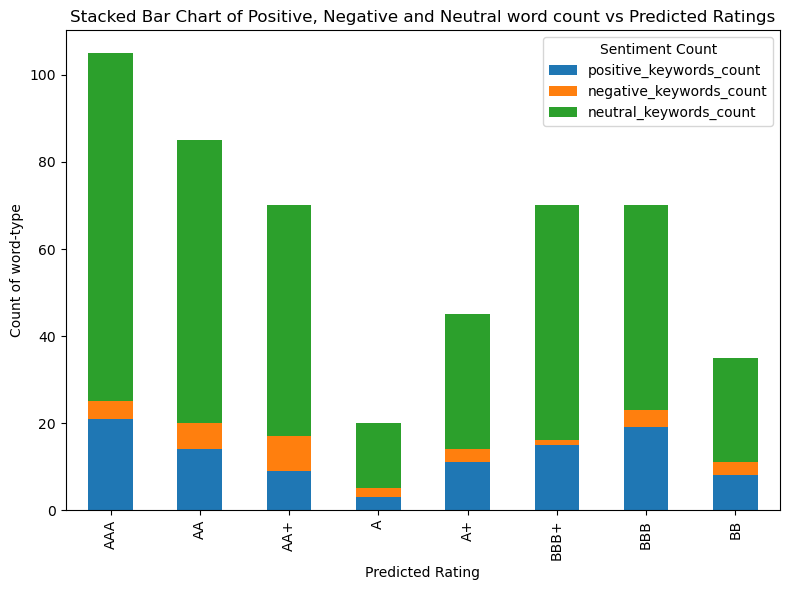

In [326]:
grouped = dfo.groupby('predicted_rating').agg({'positive_keywords_count':'sum',
                                              'negative_keywords_count':'sum',
                                             'neutral_keywords_count':'sum'}).sort_values('predicted_rating')

# Creating a stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.xlabel('Predicted Rating')
plt.ylabel('Count of word-type')
plt.title('Stacked Bar Chart of Positive, Negative and Neutral word count vs Predicted Ratings')
plt.legend(title='Sentiment Count')
plt.tight_layout()
plt.show()

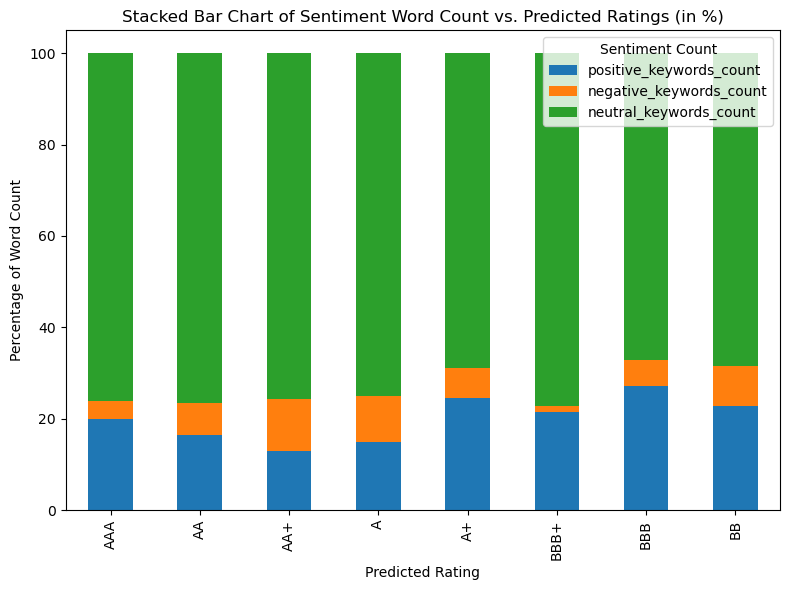

In [327]:
# Group and sum the counts for each predicted rating
grouped = dfo.groupby('predicted_rating').agg({
    'positive_keywords_count': 'sum',
    'negative_keywords_count': 'sum',
    'neutral_keywords_count': 'sum'
}).sort_values('predicted_rating')

# Convert counts to percentages by dividing each row by its total sum
grouped_perc = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Creating a stacked bar chart of percentages
grouped_perc.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.xlabel('Predicted Rating')
plt.ylabel('Percentage of Word Count')
plt.title('Stacked Bar Chart of Sentiment Word Count vs. Predicted Ratings (in %)')
plt.legend(title='Sentiment Count')
plt.tight_layout()
plt.show()

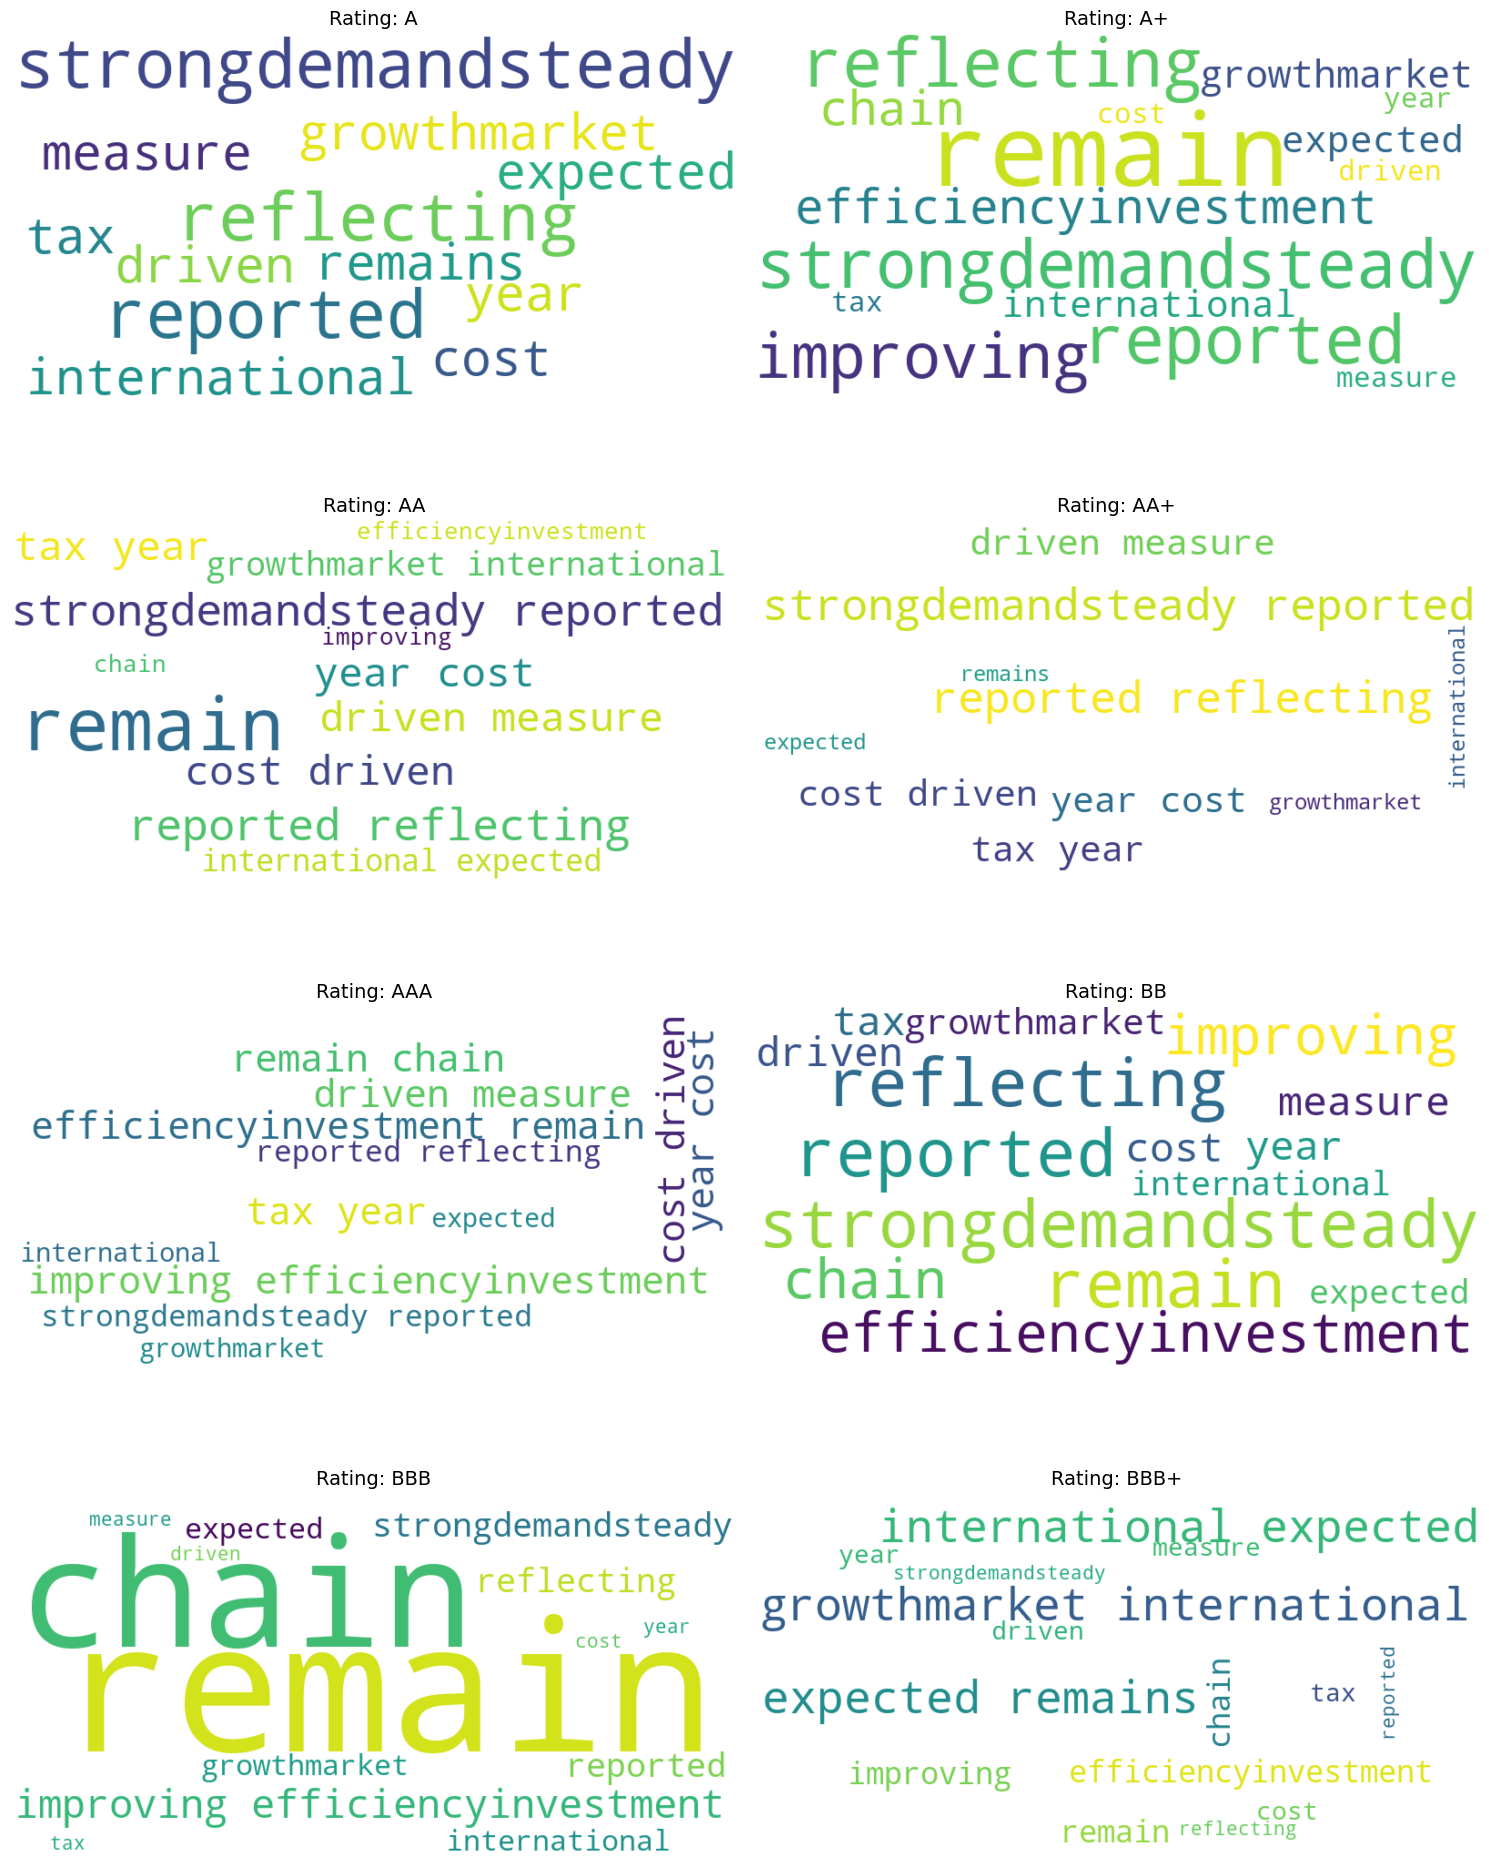

In [333]:
ratings = sorted(dfo['predicted_rating'].unique())
n_ratings = len(ratings)
n_cols = 2
n_rows = math.ceil(n_ratings / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

axes = axes.flatten()

# Loop through each rating and generate the word cloud from all keywords
for idx, rating in enumerate(ratings):
    df_rating = dfo[dfo['predicted_rating'] == rating]
    
    text = " ".join(
        df_rating['positive_keywords'].dropna().astype(str) +
        df_rating['negative_keywords'].dropna().astype(str) +
        df_rating['neutral_keywords'].dropna().astype(str)
    )
    
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    
    ax = axes[idx]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(f"Rating: {rating}", fontsize=14)

for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.show()

#### Insights
* Returns seem to be important when predicting ratings which might be reflective of market conditions. This thus can prove an indirect correlation with risk.
* Debt to EBIDTA ratio is a good financial health indicator and thus, it rightfully impacts the risk ratings.
* In terms of the relationship between positive keywords and ratings, the proportion of positive keywords increases as the ratings detoriate which could be reflective of a small dataset and most statements being positive.
* Negative keywords proportions are observed to be higher in AA+, A and A+ ratings categories as compared to the rest.
* From the wordclouds created for each rating, neutral keywords are more common at lower ratings as compared to higher ratings and the inverse applies for positive keywords.

#### Final thoughts
* Returns, market-indices that reflect the market and financial ratios like debt-invested capital ratio, price to earnings ratio that reflect the financial health influence the ratings and with more data a more robust model without any overfitting can be created that will better explain the actual ratings.
* In terms of the transcripts, more variety can be explored with more data and perhaps encountering more negative keywords might help explain the ratings better.